# Jamboree Education - Linear Regression


● Jamboree is a renowned educational institution that has successfully assisted numerous
students in gaining admission to top colleges abroad. With their proven
problem-solving methods, they have helped students achieve exceptional scores on
exams like GMAT, GRE, and SAT with minimal effort.

● To further support students, Jamboree has recently introduced a new feature on their
website. This feature enables students to assess their probability of admission to Ivy
League colleges, considering the unique perspective of Indian applicants.

● This analysis will help Jamboree in understanding what factors are important in graduate 
admissions and how these factors are interrelated among themselves. 
It will also help predict one's chances of admission given the rest of the variables.

Data set link: https://drive.google.com/file/d/1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4/view

Column description:
    
● Serial No.: This column represents the unique row identifier for each applicant in the
dataset.

● GRE Scores: This column contains the GRE (Graduate Record Examination) scores of
the applicants, which are measured on a scale of 0 to 340.

● TOEFL Scores: This column includes the TOEFL (Test of English as a Foreign Language)
scores of the applicants, which are measured on a scale of 0 to 120.

● University Rating: This column indicates the rating or reputation of the university that
the applicants are associated with.The rating is based on a scale of 0 to 5, with 5 representing the highest rating.

● SOP: This column represents the strength of the applicant's statement of purpose,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.

● LOR: This column represents the strength of the applicant's letter of recommendation,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.

● CGPA: This column contains the undergraduate Grade Point Average (GPA) of the
applicants, which is measured on a scale of 0 to 10.

● Research: This column indicates whether the applicant has research experience (1) or
not (0).

● Chance of Admit: This column represents the estimated probability or chance of
admission for each applicant, ranging from 0 to 1.

These columns provide relevant information about the applicants' academic qualifications, test
scores, university ratings, and other factors that may influence their chances of admission.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading Jamboree Data

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [87]:
data = pd.read_csv('Jamboree_Admission.csv')

In [88]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [89]:
data.shape

(500, 9)

In [90]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [91]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Insight: No null values.

In [92]:
#We donot need 'Serial No.' column for the analysis.So dropping that column
data.drop('Serial No.', axis=1, inplace=True)

In [93]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Insight: 
    
    Range of columnsin given data:
    
        GRE Score---------[290.0, 340.0]
        TOEFL Score-------[92.0,120.0]
        University Rating-[1, 5]
        SOP---------------[1, 5]
        LOR---------------[1, 5]
        CGPA--------------[6.8, 9.92]
        Research----------[0, 1]
        Chance of Admit---[0.34, 0.97]


In [94]:
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']

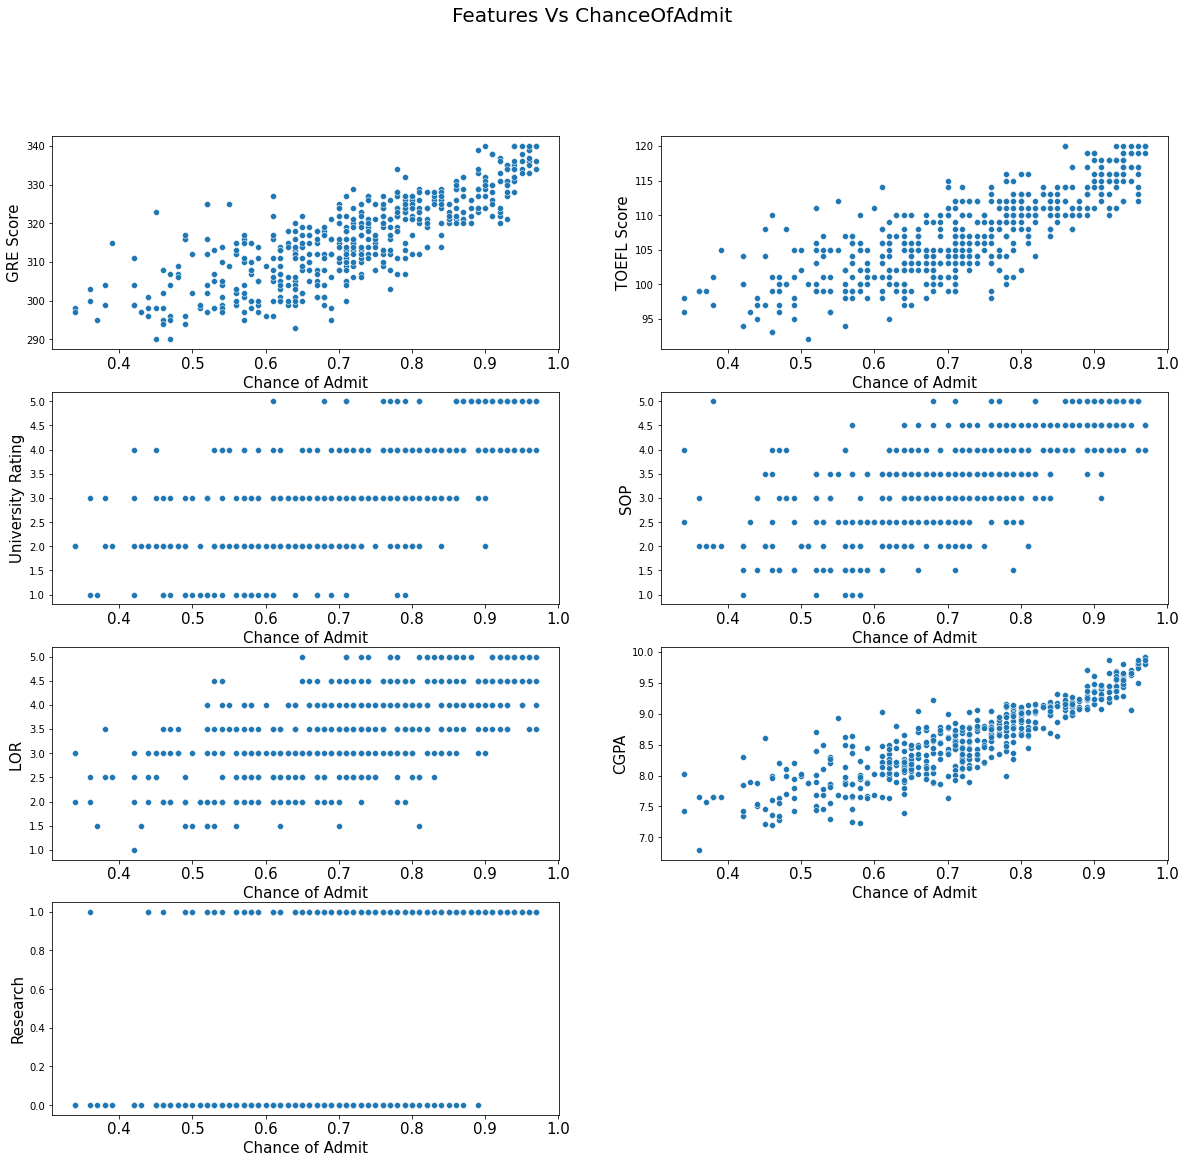

In [85]:
fig = plt.figure(figsize=(20,18))
for i,col in enumerate(columns):
    plt.subplot(len(columns)//2 +1,2,i+1)
    sns.scatterplot(x=data['Chance of Admit '], y = data[col])
    plt.xlabel('Chance of Admit' , fontsize= 15, color = 'black')
    plt.ylabel(col,fontsize= 15, color = 'black')
    plt.xticks(fontsize = 15)
fig.suptitle("Features Vs ChanceOfAdmit",fontsize= 20, color = 'black')
plt.show()

Insight:
    
   From the above plots we can observe that there is a linear correlation between GRE Score, Tofel Score, CGPA which are continuous and Chance to Admit. For the other columns SOP,LOR,University Rating as the rating increases the chance to get admission also increases. On the other hand there is high chance of getting admission for research people.

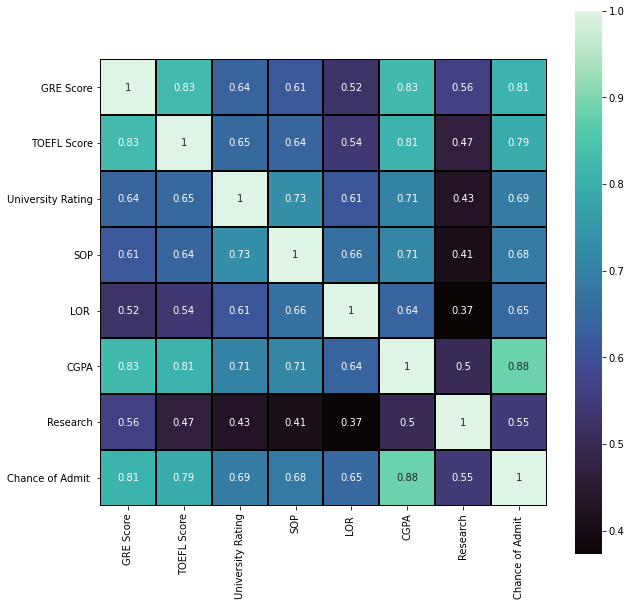

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True, cmap = 'mako', linewidths = 0.1, square= True, linecolor = 'Black')
plt.yticks(rotation=0)
plt.show()

Insights:
    
    From the above fig it is known that GRE Score and CGPA are more correlated to Chance of Admit.But there are no other features that are highly correlated. So there is no need to drop any feature for now.

# Data Preprocessing

In [96]:
data.duplicated().sum()

0

Insight:
    
    No duplicate records found.

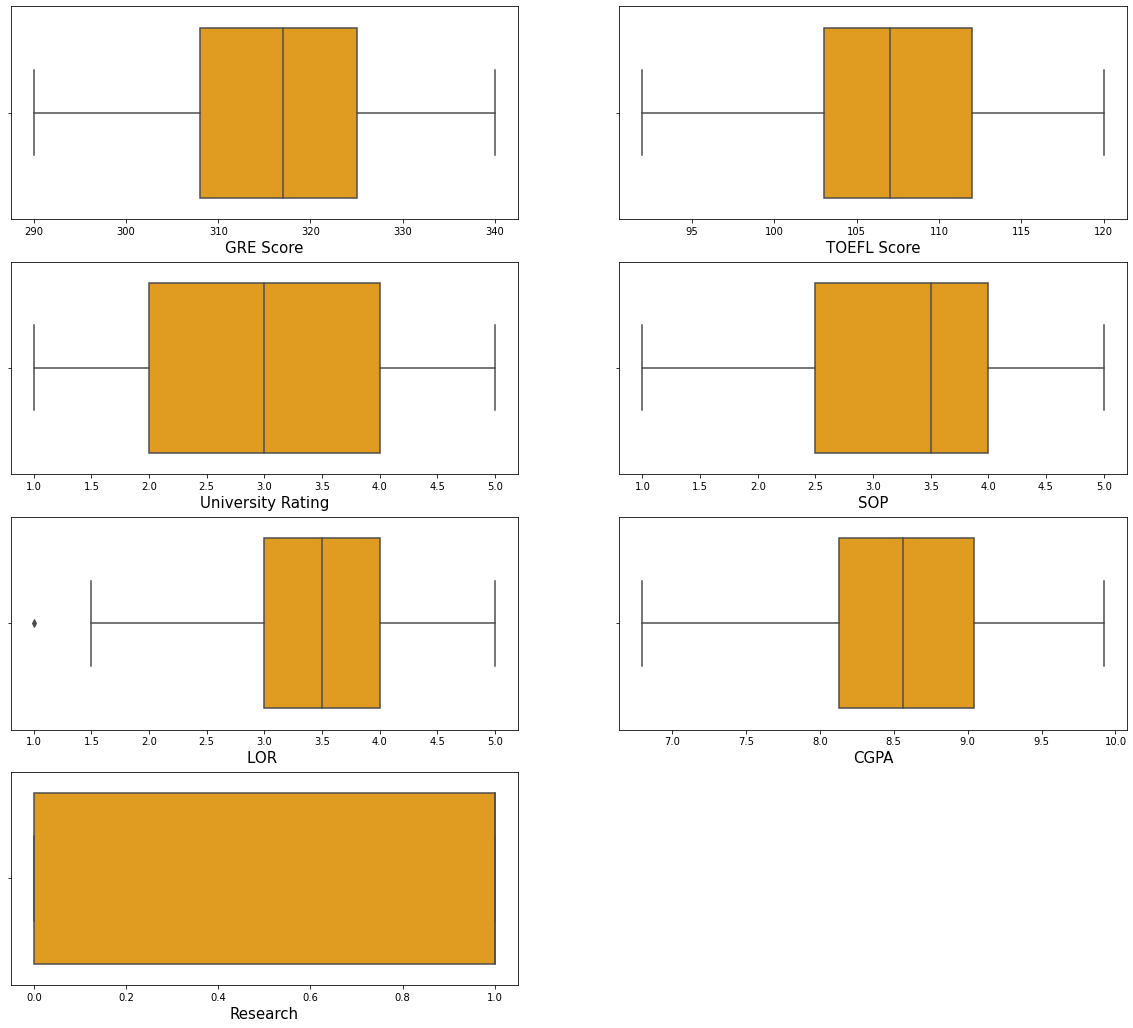

In [97]:
fig = plt.figure(figsize=(20,18))
for i,col in enumerate(columns):
    plt.subplot(len(columns)//2 +1,2,i+1)
    sns.boxplot(data = data,x= col, color = 'orange')
    plt.xlabel(col, fontsize=15)
    #plt.xticks(fontsize = 15)
#fig.suptitle("Features Vs ChanceOfAdmit",fontsize= 20, color = 'black')
plt.show()

Insights:
    
    Other than LOR there no outliers found in other features. And there is no need for treating LOR as it is one of the ratings given on scale 0-5.

# Preparing the data for modeling

### STEP-1: Encoding
    
    As our data has no categorical variables there is no need for encoding.

### STEP-2: Feature and Target split

    Splitting entire data to two parts, one contains data of 'Chance of Admit' which is the target column 
    for our analysis and the other part contains all the other features.

In [98]:
y = data['Chance of Admit ']
data.drop('Chance of Admit ', axis=1, inplace= True)
X = data

In [99]:
X.shape, y.shape

((500, 7), (500,))

### STEP-3: Train-test split

    Splitting data ito train and test data in 80/20 ratio.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
print(f"X_train:{X_train.shape},X_test:{X_test.shape}, y_train:{y_train.shape}, y_test:{y_test.shape}")

X_train:(400, 7),X_test:(100, 7), y_train:(400,), y_test:(100,)


### STEP-4: Data Normalization/Standardization
    
    Data normalization helps in scaling the whole data under one scale.We use StandardScaler for Normalizing data.

In [102]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


In [104]:
import pickle
# Save the model to a file using pickle
with open('train.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [29]:
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.576604,1.424271,0.775459,0.633979,0.021730,1.597217,0.895434
1,-0.248961,0.109306,0.775459,1.141162,0.564984,0.764683,0.895434
2,-0.157683,-0.383805,-0.972054,-1.394754,-1.064777,-1.549762,-1.116777
3,-0.431518,0.273677,-0.098298,-0.380387,-0.521524,0.181909,-1.116777
4,0.846378,0.766789,-0.098298,0.126796,-0.521524,0.781333,0.895434


In [30]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434
...,...,...,...,...,...,...,...
395,1.120212,0.602418,0.775459,1.141162,1.108237,0.997792,0.895434
396,-0.979187,-0.383805,-0.972054,-0.887570,-0.521524,-0.600673,0.895434
397,-1.344300,-1.370029,-1.845810,-1.394754,-1.608031,-2.215790,-1.116777
398,-0.705353,-0.383805,-0.972054,-0.887570,0.564984,-1.499810,-1.116777


In [31]:
y_train = y_train.reset_index(drop=True)
y_train

0      0.77
1      0.71
2      0.62
3      0.72
4      0.75
       ... 
395    0.87
396    0.72
397    0.57
398    0.55
399    0.62
Name: Chance of Admit , Length: 400, dtype: float64

# Building Linear Regression model using Statsmodel lib

In [32]:
X_sm = sm.add_constant(X_train)

In [33]:
X_train.shape,y_train.shape,X_sm.shape

((400, 7), (400,), (400, 8))

In [34]:
model = sm.OLS(y_train, X_sm)
results = model.fit()


# statstical summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          3.41e-142
Time:                        17:04:29   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

Insights:
    
    From the above summary we can say that CGPA and GRE score are more important features as they 
    have more weights.
    The adj R2_score is descent value of 0.81.

# Assumptions of linear regression.

1. No multicolinearity: 

    Multicollinearity check by VIF(Variance Inflation Factor) score.
    Variables are dropped one-by-one till none has a VIF>5.
    
    
2. Mean of residuals should be close to zero.


3. Linear relationship between independent & dependent variables.

    This can be checked using the following methods:
    ■ Scatter plots
    ■ Regression plots
    ■ Pearson Correlation
    
    
4. Test for Homoscedasticity

    ■ Create a scatterplot of residuals against predicted values.
    ■ Perform a Goldfeld-Quandt test to check the presence of
    Heteroscedasticity in the data.
    ■ If the obtained p-value>0.05, there is no strong evidence of
    heteroscedas
    
    
5. Normality of residuals

    ■ Almost bell-shaped curve in residuals distribution.
    
    
6. Impact of outliers

## Assumption-1: Multicolinearity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [37]:
X_t = pd.DataFrame(X_train, columns=data.columns)

vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.65
0,GRE Score,4.49
1,TOEFL Score,3.66
3,SOP,2.79
2,University Rating,2.57
4,LOR,1.98
6,Research,1.52


Insights:
    
    As the Variance Inflation Factor(VIF) score is less than 5 for all the features we can say that there is 
    no much multicolinearity between the features.

In [38]:
model = LinearRegression()
model.fit(X_t, y_train)

LinearRegression()

In [39]:
model.score(X_t, y_train)

0.8210671369321554

Insights:
    
    The R2-score for this model is 0.82 considering all the features. Let us see if there is a difference in the 
    model score after removing CGPA assuming it is correlational.

In [40]:
import pickle
# Save the model to a file using pickle
with open('Jumbore_LinReg_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [41]:
X_t1 = X_t.drop(columns = ['CGPA'])

In [42]:
vif = pd.DataFrame()

vif['Features'] = X_t1.columns
vif['VIF'] = [variance_inflation_factor(X_t1.values, i) for i in range(X_t1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,3.71
1,TOEFL Score,3.42
3,SOP,2.68
2,University Rating,2.53
4,LOR,1.88
5,Research,1.52


Insights:
    
    The VIF values decreased a little but there is no drastic change in them. Let us check if the model score 
    improves without CGPA

In [43]:
model1 = LinearRegression()
model1.fit(X_t1, y_train)

LinearRegression()

In [44]:
model1.score(X_t1, y_train)

0.7712805222402632

Insight:
    
    The model score got reduced without CGPA indicating that it is an important feature.

## Assumption-2: Normality of Residuals

In [45]:
y_hat = model.predict(X_t)

In [46]:
errs = y_train - y_hat
errs[:5]

0   -0.023197
1   -0.035079
2   -0.024015
3    0.047252
4    0.099054
Name: Chance of Admit , dtype: float64

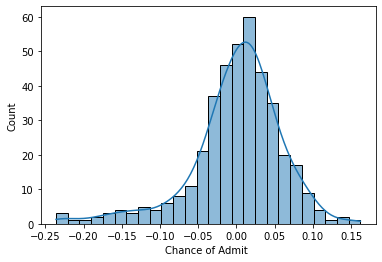

In [47]:
sns.histplot(errs, kde= True)
plt.show()

Insights:
    
    Mean of residuals is distributed  around zero from the above plot. So this assumptions holds true for the 
    given data.

## Assumption-3: Linear Relationship

Insights:
    
    From the scatter plot in the bivariate analysis we can say that there is linear relationship 
    between dependent variable and independent variables.

## Assumption-4: Homoscedasticity

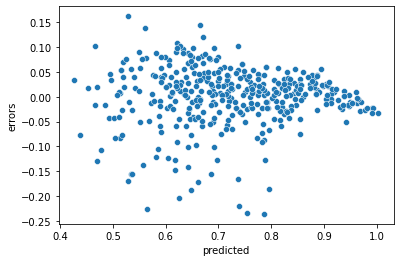

In [48]:
sns.scatterplot(x = y_hat, y= errs)
plt.xlabel("predicted")
plt.ylabel("errors")
plt.show()

Insights:
    
   There is no homoscedasticity as there is no cone shape pattern in the plot.Assumption for homscedasticity 
holds true for given data.

## Assumption-5: Normality of residuals

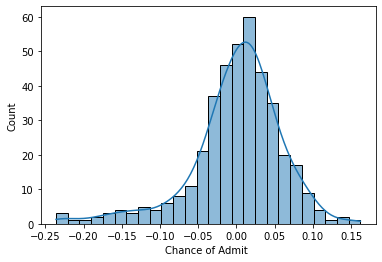

In [49]:
sns.histplot(errs, kde=True)
plt.show()

Insights:
    
    The plot for residuals nearly is normally distributed which indicates the errors are mostly 
    concentrated nearer to zero. Assumption of normality holds true for the given data.

## Assumption-6: Impact of outliers

As there are no outliers in our data there is no impact of outliers.

In [50]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, y_hat)
print("MAE train:", mae)

MAE train: 0.04253334061164314


In [51]:
mae = mean_absolute_error(y_test, model.predict(X_test))
print("MAE test:", mae)

MAE test: 0.0427226542770537


In [52]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_train, y_hat))
print("RMSE train:", rmse)

RMSE train: 0.059384808482100516


In [53]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("RMSE test:", rmse)

RMSE test: 0.060865880415783134


In [54]:
R2_score_train = model.score(X_train,y_train)
print("R2_score train:", R2_score_train)

R2_score train: 0.8210671369321554


In [55]:
R2_score_test = model.score(X_test,y_test)
print("R2_score test:", R2_score_test)

R2_score test: 0.8188432567829628


In [56]:
n,d = X_train.shape
adj_r2 = 1 - ((1- R2_score_train)*(n-1)/(n-d-1))
print("Adj R2_score train:",adj_r2)

Adj R2_score train: 0.8178719072345153


In [57]:
n,d = X_test.shape
adj_r2 = 1 - ((1- R2_score_test)*(n-1)/(n-d-1))
print("Adj R2_score test:",adj_r2)

Adj R2_score test: 0.8050595915381882


Insights:
    
    Taking 
    Adj R2_score: 0.821,
    MAE: 0.042
    RSME: 0.059
    into consideration the model has decent performance with minimum errors.
                